In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt')
import re
from collections import Counter

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ivanradosavljevic/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [54]:
train = pd.read_csv("/Users/ivanradosavljevic/Documents/ML/train.csv")
test = pd.read_csv("/Users/ivanradosavljevic/Documents/ML/test.csv")
attributes = pd.read_csv("/Users/ivanradosavljevic/Documents/ML/attributes.csv")
descriptions = pd.read_csv("/Users/ivanradosavljevic/Documents/ML/product_descriptions.csv")

In [3]:
train.head()

,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74067 entries, 0 to 74066
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             74067 non-null  int64  
 1   product_uid    74067 non-null  int64  
 2   product_title  74067 non-null  object 
 3   search_term    74067 non-null  object 
 4   relevance      74067 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.8+ MB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166693 entries, 0 to 166692
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             166693 non-null  int64 
 1   product_uid    166693 non-null  int64 
 2   product_title  166693 non-null  object
 3   search_term    166693 non-null  object
dtypes: int64(2), object(2)
memory usage: 5.1+ MB


In [6]:
train.isna().sum()

id               0
product_uid      0
product_title    0
search_term      0
relevance        0
dtype: int64

In [7]:
test.isna().sum()

id               0
product_uid      0
product_title    0
search_term      0
dtype: int64

In [8]:
train.relevance.value_counts()

3.00    19125
2.33    16060
2.67    15202
2.00    11730
1.67     6780
1.33     3006
1.00     2105
2.50       19
2.25       11
2.75       11
1.75        9
1.50        5
1.25        4
Name: relevance, dtype: int64

In [9]:
(unique, counts) = np.unique(train['relevance'], return_counts=True)

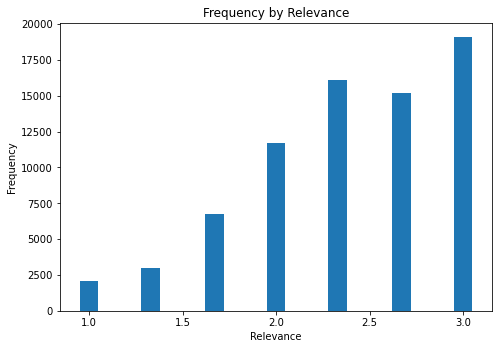

In [10]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(unique, counts, width = 0.1)
ax.set_xlabel('Relevance')
ax.set_ylabel('Frequency')
ax.set_title('Frequency by Relevance')
plt.show()

In [11]:
pidTrain = np.unique(train['product_uid'])
pidTest = np.unique(test['product_uid'])
pidAttributes = np.unique(attributes['product_uid'])
pidDescriptions = np.unique(descriptions['product_uid'])

In [12]:
len(pidTrain)

54667

In [13]:
len(pidTest)

97460

In [14]:
# get pids that exist in both sets
intersection = list(set(pidTest) & set(pidTrain))

In [15]:
# get unique pids in train and test sets
len(pidTest) + len(pidTrain) - len(intersection)

124428

In [16]:
len(pidDescriptions)

124428

In [17]:
# check do we have same pids in descriptions file like we have in train and test file
(set(pidTrain) <= set(pidDescriptions)) & (set(pidTest) <= set(pidDescriptions))

True

In [55]:
train = pd.merge(train, descriptions, on='product_uid')

In [56]:
test = pd.merge(test, descriptions, on='product_uid')

In [20]:
len(pidAttributes)

86418

In [21]:
set(pidTrain) <= set(pidAttributes)

False

In [22]:
joined = np.unique([*pidTrain, *pidTest])

In [23]:
len(list(set(pidAttributes) - set(joined)))

155

In [24]:
attributes.isna().sum()

product_uid     155
name            155
value          2284
dtype: int64

In [25]:
attributes.dropna(inplace=True)

In [26]:
train['search_term'].value_counts()[:10]

3 WAY TOGGLE SWITCH                            16
anderson windows 400 seriesimpact resistant    16
1/2 zip wall                                   16
contact paoer                                  16
everblit heavy duty canvas dropcloth           16
moen chat oil bronze tub/shower faucet         16
metal sheet                                    16
burgundy red foot stools                       16
bed frames headboaed                           16
wrt111sfdb ice maker                           15
Name: search_term, dtype: int64

In [27]:
test['search_term'].value_counts()[:10]

patio chair cushions    36
popcorn machine         23
hatchet                 23
dowel                   23
led shop light          23
bathroom cabinet        23
pocket door hardware    23
t8 bulbs                23
rebar                   23
glass sheet             23
Name: search_term, dtype: int64

In [28]:
train.loc[train['search_term'] == '1/2 zip wall']

,id,product_uid,product_title,search_term,relevance,product_description
3393,10498,101813,Foremost Naples 26-1/2 in. W Wall Cabinet in W...,1/2 zip wall,2.67,Reflecting the subtle style of the Naples coll...
12611,38911,109192,Nuvelle Deco Planks Picket Fence Sun Baked 1/2...,1/2 zip wall,2.00,Real Wood Wall Planks that instantly transform...
13078,40399,109659,Merola Tile Metro Octagon Matte White with Dot...,1/2 zip wall,1.33,The Merola Tile Metro Octagon Matte White with...
34934,106850,134417,7/16 In. 4 Ft. x 8 Ft. Huber Zip OSB Wall Shea...,1/2 zip wall,2.00,It's a one-of-a-kind structural roof and wall ...
36036,110150,135914,Foremost Gazette 23-1/2 in. W x 32 in. H Wall ...,1/2 zip wall,2.00,"The beautiful Gazette 23 1/2 in. x 32 in., bev..."
36930,112914,137194,Merola Tile Metro Hex 2 in. Matte White 10-1/2...,1/2 zip wall,2.00,This Merola Tile Metro Hex 2 in. Matte White 1...
37987,116094,138631,Foremost Ashburn 23-1/2 in. W Wall Cabinet in ...,1/2 zip wall,1.00,"Exquisite design, rich mahogany finish and sma..."
51094,155181,159012,MS International Dove Gray Arabesque 10-1/2 in...,1/2 zip wall,3.00,With the MS International 10-1/2 in. x 15-1/2 ...
51390,156077,159515,Martha Stewart Living Placid 26-1/2 in. x 23-1...,1/2 zip wall,1.00,Add simple classic style to your room with the...
54376,164858,164781,Merola Tile Metro Penny Matte Light Green 9-7/...,1/2 zip wall,1.67,The Merola Tile Metro Penny Matte Light Green ...


In [29]:
train['product_title'].value_counts()[:10]

Pressure-Treated Timber #2 Southern Yellow Pine (Common: 4 in. x 4 in. x 8 ft.; Actual: 3.56 in. x 3.56 in. x 96 in.)    21
Lithonia Lighting All Season 4 ft. 2-Light Grey T8 Strip Fluorescent Shop Light                                          21
2 in. x 4 in. x 96 in. Premium Kiln-Dried Whitewood Stud                                                                 18
Ryobi ONE+ 18-Volt Lithium-Ion Ultimate Combo Kit (6-Tool)                                                               17
Custom Building Products VersaBond Gray 50 lb. Fortified Thin-Set Mortar                                                 17
Ryobi ONE+ 18-Volt Lithium-Ion Cordless Drill/Driver and Impact Driver Kit (2-Tool)                                      17
Whirlpool Gold Series Top Control Dishwasher in Monochromatic Stainless Steel with Silverware Spray                      15
Owens Corning R-30 Unfaced Insulation Continuous Roll 15 in. x 25 ft.                                                    14
Ryobi 18

In [30]:
test['product_title'].value_counts()[:10]

2 in. x 4 in. x 96 in. Premium Kiln-Dried Whitewood Stud                                               52
Whirlpool 1.7 cu. ft. Over the Range Microwave in Stainless Steel                                      35
2 in. x 4 in. x 8 ft. #2 Pressure-Treated Lumber                                                       35
Samsung 25.5 cu. ft. French Door Refrigerator in Stainless Steel                                       35
LG Electronics 7,500 BTU 115-Volt Window Air Conditioner with Cool, Heat and Remote                    33
SmartSide 48 in. x 96 in. Composite Panel Siding (Actual: 0.315 in. x 48.56 in. x 95.87 in.)           31
Custom Building Products VersaBond Gray 50 lb. Fortified Thin-Set Mortar                               31
Oriented Strand Board (Common: 7/16 in. x 4 ft. x 8 ft.; Actual: 0.418 in. x 47.75 in. x 95.75 in.)    30
Honeywell 1 in. Allergen Plus Pleated FPR 7 Air Filter - Custom Sizes Available                        28
Ryobi ONE+ 18-Volt Lithium-Ion Cordless Super 

In [31]:
train.loc[train['product_title'] == 'Lithonia Lighting All Season 4 ft. 2-Light Grey T8 Strip Fluorescent Shop Light']

,id,product_uid,product_title,search_term,relevance,product_description
5221,16352,102893,Lithonia Lighting All Season 4 ft. 2-Light Gre...,4 flourescent,2.33,The 4 ft. All Season shop light is ideal for g...
5222,16353,102893,Lithonia Lighting All Season 4 ft. 2-Light Gre...,4 led light,3.00,The 4 ft. All Season shop light is ideal for g...
5223,16356,102893,Lithonia Lighting All Season 4 ft. 2-Light Gre...,4ft light,3.00,The 4 ft. All Season shop light is ideal for g...
5224,16358,102893,Lithonia Lighting All Season 4 ft. 2-Light Gre...,8 light,2.33,The 4 ft. All Season shop light is ideal for g...
5225,16360,102893,Lithonia Lighting All Season 4 ft. 2-Light Gre...,cree led 32w t8,3.00,The 4 ft. All Season shop light is ideal for g...
5226,16361,102893,Lithonia Lighting All Season 4 ft. 2-Light Gre...,econo florecent bulb,2.33,The 4 ft. All Season shop light is ideal for g...
5227,16363,102893,Lithonia Lighting All Season 4 ft. 2-Light Gre...,florecent bulb holder,2.00,The 4 ft. All Season shop light is ideal for g...
5228,16364,102893,Lithonia Lighting All Season 4 ft. 2-Light Gre...,flourescent shop light,3.00,The 4 ft. All Season shop light is ideal for g...
5229,16365,102893,Lithonia Lighting All Season 4 ft. 2-Light Gre...,fluorescent fixture,2.33,The 4 ft. All Season shop light is ideal for g...
5230,16366,102893,Lithonia Lighting All Season 4 ft. 2-Light Gre...,Fluorescent light TUBES,3.00,The 4 ft. All Season shop light is ideal for g...


In [32]:
attributes.loc[attributes['product_uid'] == 102893]

,product_uid,name,value
71197,102893.0,Actual Color Temperature (K),0
71198,102893.0,Bulb Type Included,No Bulbs Included
71199,102893.0,Bullet01,6 in. textured gray reflector with pull chain ...
71200,102893.0,Bullet02,Requires (2) 32-Watt T8 linear energy-efficien...
71201,102893.0,Bullet03,"Fully assembled, ready-to-install with mountin..."
71202,102893.0,Bullet04,"Energy Star qualified, UL listed and title 24 ..."
71203,102893.0,Bullet05,Starts reliably down to 0°s F
71204,102893.0,Bullet06,2 year warranty
71205,102893.0,Certifications and Listings,1-UL Listed
71206,102893.0,Collection Name,Shoplight


In [33]:
# check how many different attributes we have
len(set(attributes['name']))

5409

In [34]:
# brand, bullets, dimensions and colors are main attributes
attributes['name'].value_counts()[:25]

Bullet02                       86248
Bullet03                       86226
MFG Brand Name                 86185
Bullet04                       86174
Bullet01                       85940
Product Width (in.)            61137
Bullet05                       60528
Product Height (in.)           54698
Product Depth (in.)            53652
Product Weight (lb.)           45175
Bullet06                       44901
Color Family                   41508
Bullet07                       34349
Material                       31499
Color/Finish                   28539
Bullet08                       26645
Certifications and Listings    24583
Bullet09                       20567
Assembled Height (in.)         18299
Assembled Width (in.)          18263
Assembled Depth (in.)          18198
Product Length (in.)           16705
Bullet10                       14763
Indoor/Outdoor                 12939
Bullet11                       11784
Name: name, dtype: int64

In [35]:
attributes[attributes['name'].str.contains("Bullet")].name.unique()

array(['Bullet01', 'Bullet02', 'Bullet03', 'Bullet04', 'Bullet05',
       'Bullet06', 'Bullet07', 'Bullet08', 'Bullet10', 'Bullet18',
       'Bullet09', 'Bullet11', 'Bullet12', 'Bullet13', 'Bullet14',
       'Bullet15', 'Bullet16', 'Bullet17', 'Bullet20', 'Bullet21',
       'Bullet Proof', 'Bullet19', 'Bullet22'], dtype=object)

In [36]:
attributes[attributes['name'].str.contains("Color")].name.value_counts()[:10]

Color Family                    41508
Color/Finish                    28539
Color                            6212
Color/Finish Family              4630
Fixture Color/Finish             4117
Fixture Color/Finish Family      2256
Shade Color Family               2006
Actual Color Temperature (K)     1421
Color Rendering Index            1118
Top Color Family                  996
Name: name, dtype: int64

In [37]:
attributes[attributes['name'].str.contains("Flooring Product Type")].value.unique()

array(['Vinyl Plank', 'Area Rug', 'Vinyl Tile', 'Porcelain Tile',
       'Mosaic Tile', 'Roll Runner', 'Tile Sample', 'Ceramic Tile',
       'Vinyl Tool', 'Vinyl Sheet', 'Backer Board',
       'Decorative Accent & Border', 'Carpet', 'Accessory',
       'Underlayment', 'Rug Pad', 'Solid Bamboo Board', 'Stair Tread',
       'Door Mat', 'Solid Wood Moulding/Trim', 'Carpet Padding/Gripper',
       'Tile Tool', 'Ceramic Floor/Wall Tile', 'Artificial Turf',
       'Engineered Wood Moulding/Trim', 'Laminate Wood Plank',
       'Engineered Click Wood', 'Marble Tile', 'Solid Wood Board',
       'Vinyl Moulding/ Trim', 'Tool', 'Limestone Tile',
       'Travertine Tile', 'Commercial Mat', 'Cove Base', 'Slate Tile',
       'Glass Tile', 'Garage Floor Roll', 'Transition Strips',
       'Garage Floor Accessory', 'Vinyl Flooring Sample',
       'Patching/Repair', 'Tile Edging', 'Flooring Tape',
       'Laminate Moulding/Trim', 'Laminate Sample', 'Pebble Tile',
       'Bath Mat', 'Engineered Wood Boar

In [57]:
train['number_of_search_words'] = train['search_term'].str.split().apply(len)

In [58]:
test['number_of_search_words'] = test['search_term'].str.split().apply(len)

In [40]:
train.number_of_search_words.value_counts()

3     26575
2     18386
4     14847
5      6601
1      4503
6      2076
7       741
8       204
9        80
11       31
10       10
12        9
14        4
Name: number_of_search_words, dtype: int64

In [41]:
test.number_of_search_words.value_counts()

3     56420
2     51329
4     28100
1     12772
5     12004
6      4004
7      1241
8       469
9       145
10      104
12       54
11       46
14        4
13        1
Name: number_of_search_words, dtype: int64

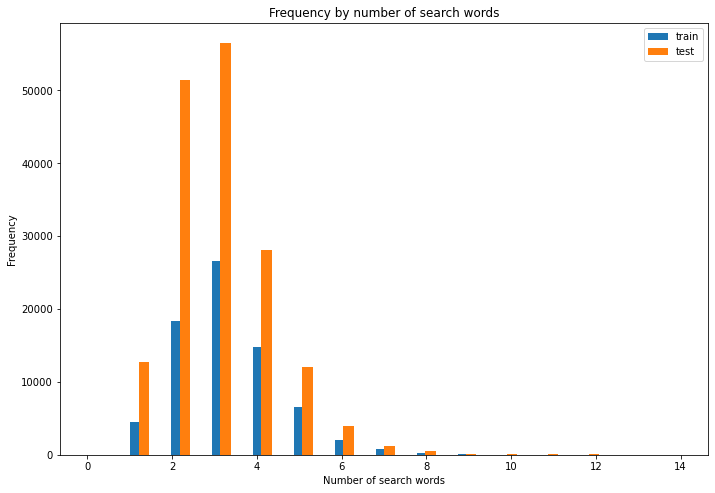

In [42]:
fig = plt.figure()
ax = fig.add_axes([0,0,1.5,1.5])
bins = np.linspace(0, 14, 30)
ax.hist([train['number_of_search_words'], test['number_of_search_words']], bins, width = 0.25, label=['train', 'test'])
plt.legend(loc='upper right')
plt.xlabel('Number of search words')
plt.ylabel('Frequency')
plt.title('Frequency by number of search words')
plt.show()

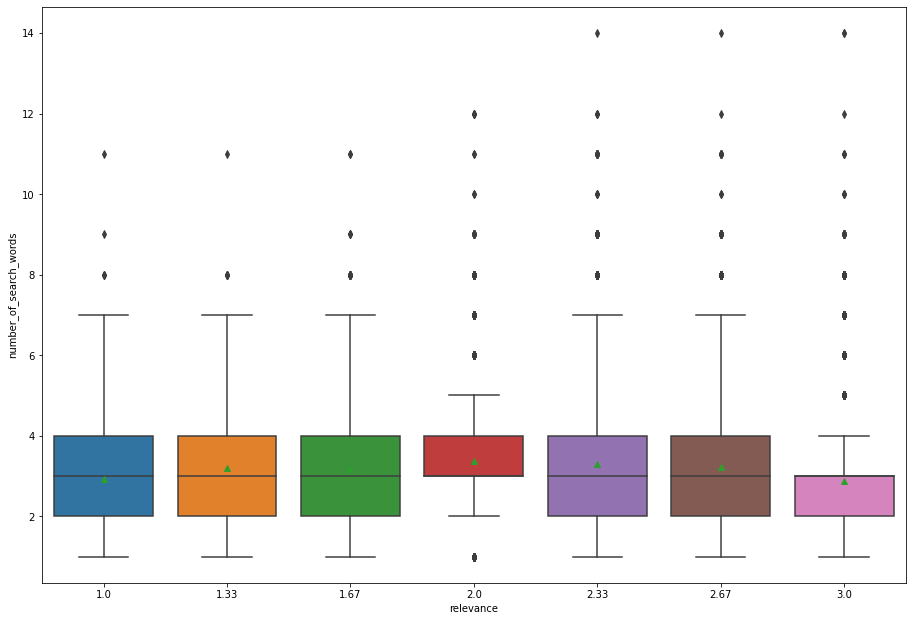

In [43]:
validData = train[train["relevance"].isin([1.0, 1.33, 1.67, 2.0, 2.33, 2.67, 3.0])]
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
sns.boxplot(x="relevance", y="number_of_search_words", data=validData, showmeans=True, ax=ax)

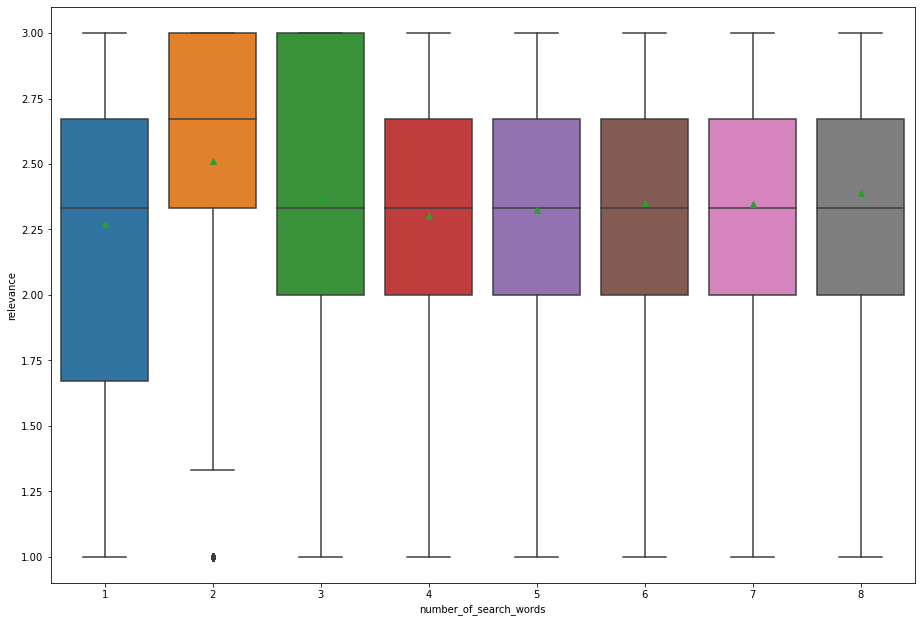

In [44]:
validData = train[(train["relevance"].isin([1.0, 1.33, 1.67, 2.0, 2.33, 2.67, 3.0])) & (train["number_of_search_words"] < 9)]
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
sns.boxplot(x="number_of_search_words", y="relevance", data=validData, showmeans=True, ax=ax)

In [45]:
dataWithAttributes = list(set(pidTrain) & set(pidAttributes))

In [46]:
dfWithAttributes = train[train["product_uid"].isin(dataWithAttributes)]

In [47]:
dfWithoutAttributes = train[~train["product_uid"].isin(dataWithAttributes)]

Text(0.5, 0, 'Not Existing')

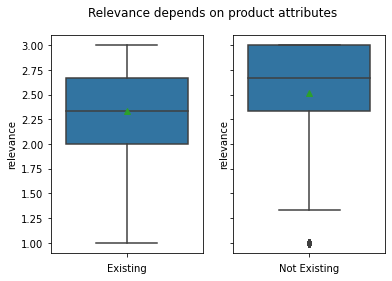

In [48]:
fig, axes = plt.subplots(1, 2, sharey=True)
fig.suptitle('Relevance depends on product attributes')
sns.boxplot(y="relevance", data=dfWithAttributes, showmeans=True, ax=axes[0])
axes[0].set_xlabel('Existing')
sns.boxplot(y="relevance", data=dfWithoutAttributes, showmeans=True, ax=axes[1])
axes[1].set_xlabel('Not Existing')

In [49]:
attributes[attributes['name'] == 'Color/Finish'].value.value_counts()[:10]

White                3988
Black                1514
Stainless Steel      1024
Chrome                976
Gray                  465
Brushed Nickel        450
Oil Rubbed Bronze     369
Polished Chrome       365
Primed White          324
Brown                 308
Name: value, dtype: int64

In [59]:
# create dictionary with words from product titles and descriptions and create a function that will use this dictionary to fix some typos
def words(text): return re.findall(r'\w+', text.lower())

WORDS = Counter(words(train.product_title.to_string() + test.product_title.to_string() + descriptions.product_description.to_string()))

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [60]:
# apply function from above to search_term column
def correct_spelling_in_search(row):
    search_list = nltk.word_tokenize(row.search_term)
    corrected_search = "";
    for word in search_list:
        corrected_search = corrected_search + " " + correction(word)
    return corrected_search.lstrip()

In [61]:
train['search_term'] = train.apply(lambda row: correct_spelling_in_search(row), axis=1)

In [62]:
test['search_term'] = test.apply(lambda row: correct_spelling_in_search(row), axis=1)

In [63]:
# calculate ratio of words in search that are from product title
def calculate_percentage_in_title(row):
    product_title = re.sub('([a-z])([A-Z])', r'\1 \2', row.product_title).replace("-", " ").lower()
    search = re.sub('([a-z])([A-Z])', r'\1 \2', row.search_term).lower()
    search_words = nltk.word_tokenize(search)
    product_title_words = nltk.word_tokenize(product_title)
    return len(list(set(search_words) & set(product_title_words)))/len(search_words)

In [64]:
# calculate ratio of words in search that are from product description
def calculate_percentage_in_description(row):
    description = re.sub('([a-z])([A-Z])', r'\1 \2', row.product_description).replace("-", " ").lower()
    search = re.sub('([a-z])([A-Z])', r'\1 \2', row.search_term).lower()
    search_words = nltk.word_tokenize(search)
    product_description_words = nltk.word_tokenize(description)
    return len(list(set(search_words) & set(product_description_words)))/len(search_words)

In [65]:
train['%_search_words_in_title'] = train.apply(lambda row: calculate_percentage_in_title(row), axis=1)

In [66]:
train['%_search_words_in_description'] = train.apply(lambda row: calculate_percentage_in_description(row), axis=1)

In [67]:
test['%_search_words_in_title'] = test.apply(lambda row: calculate_percentage_in_title(row), axis=1)

In [68]:
test['%_search_words_in_description'] = test.apply(lambda row: calculate_percentage_in_description(row), axis=1)

In [69]:
df_brand = attributes[attributes.name == "MFG Brand Name"][["product_uid", "value"]].rename(columns={"value": "brand"})

In [70]:
train = pd.merge(train, df_brand, how='left', on='product_uid')
test = pd.merge(test, df_brand, how='left', on='product_uid')

In [71]:
import sklearn
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [72]:
X_train = train[['product_uid','number_of_search_words', '%_search_words_in_title', '%_search_words_in_description']].values
y_train = train['relevance'].values
X_test = test[['product_uid','number_of_search_words', '%_search_words_in_title', '%_search_words_in_description']].values

In [73]:
# after investigation Bagging Regressor with base estimator = Random Forest show best result so we will use it for parameter tuning
rf = RandomForestRegressor(n_estimators=15, max_depth=6, random_state=0)
dt = DecisionTreeRegressor(max_depth=6, random_state=3)
clf = BaggingRegressor(rf, n_estimators=45, max_samples=0.1, random_state=25)

In [74]:
params = {'n_estimators': [25, 50, 75, 100], 'max_samples': [0.075, 0.1, 0.15, 0.2], 'base_estimator': [dt, rf]}

In [75]:
bagging_regressor_grid = GridSearchCV(BaggingRegressor(), param_grid = params, cv = 5, scoring = 'neg_root_mean_squared_error')

In [76]:
bagging_regressor_grid.fit(X_train, y_train)
print('Best R^2 Score Through Grid Search : %.3f'%bagging_regressor_grid.best_score_)
print('Best Parameters : ',bagging_regressor_grid.best_params_)

Best R^2 Score Through Grid Search : -0.497
Best Parameters :  {'base_estimator': RandomForestRegressor(max_depth=6, n_estimators=15, random_state=0), 'max_samples': 0.075, 'n_estimators': 75}


In [77]:
clf = bagging_regressor_grid.best_estimator_

In [78]:
y_pred = clf.predict(X_test)

In [79]:
id_test = test['id']

In [80]:
pd.DataFrame({"id": id_test, "relevance": y_pred}).to_csv('final_submission.csv',index=False)